# Лабораторная работа №1
---
### Решение задачи линейной регрессии с помощью
* метода наименьших квадратов
* псевдообратной матрицы
* класса LinearRegression из Scikit-learn

### Проверка гипотезы "Зарплата работника прямо пропорционально зависит от его стажа работы"



#### Регрессия
**Регрессия** — это метод статистического анализа и машинного обучения, который позволяет понять и смоделировать зависимость между одной целевой переменной и одной или несколькими входными переменными (признаками). Основная цель регрессии — предсказать численное значение целевой переменной на основе известных значений признаков.

**Линейная регрессия** — это частный случай регрессии, где предполагается, что зависимость между признаками и целевой переменной является линейной. Цель — найти такие коэффициенты, чтобы модель максимально точно предсказывала целевую переменную.

### Уравнение линейной регрессии. Общий вид

$$ y = \beta_0 + \beta_1\cdot f_1(x) + \beta_2\cdot f_2(x) + \dots + \beta_k\cdot f_k(x) + r.  $$
* $f_i - $ известные функции
* $\beta_i$ - коэффициенты регрессии (параметры, которые надо найти)
$$ \sum\limits_{i = 1}^{k} r_i^2  \rightarrow min$$

### Уравнение линейной регрессии
$$ y = \beta_0 + \beta_1\cdot x $$

### Обозначения
$$ X \vec{\beta} = \vec{y} $$
* $ X $ - матрица факторов (design matrix)
* $ \vec{\beta} $ - parameter vector (вектор параметров)
* $ \vec{y} $ - вектор наблюдений (observation vector) (вектор с данными(наблюдениями))
* $y = \beta_0 + \beta_1 \cdot x$ - линия регрессии
* $\beta_0, \beta_1$ - коэффициенты регрессии

$$ X =
\left[ {\begin{array}{cc}
    1 & x_1 \\
    1 & x_2 \\
    \vdots & \vdots \\
    1 & x_n \\
\end{array} } \right], \ \ \
\vec{\beta} =
\left[ {\begin{array}{cc}
    \beta_0 \\
    \beta_1 \\
\end{array} } \right], \ \ \
\vec{y} =
\left[ {\begin{array}{cc}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n \\
\end{array} } \right].
$$

## Способы оценки точности

$ y_i $ — настоящие данные  
$ \hat{y}_i $ — что модель спрогнозировала для каждого объекта.  
$ \bar{y} $ - это среднее арифметическое всех наблюдений y.

#### Сумма квадратов остатков (RSS):

$$
RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


#### Среднеквадратичная ошибка (MSE):

$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$


#### Корень из среднеквадратичной ошибки (RMSE):

$$
RMSE = \sqrt{MSE}
$$


#### Средняя абсолютная ошибка (MAE):

$$
MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$


#### Коэффициент детерминации \( R^2 \):

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

Если важны большие ошибки — лучше смотреть MSE или RMSE.

Если важна стабильность и меньше влияние выбросов — MAE.

Для общей оценки качества — 
$ 𝑅^2 $. Коэффициент детерминации показывает, какую часть разброса (вариации) реальных данных по y объясняет модель.

### Импорт обязательных библиотек для решения задачи и импорт датасета

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Импорт датасета и вывод первых пяти строк для понимания, как он выглядит

Датасет представляет собой таблицу с двумя основными признаками. В первом столбце указано количество лет опыта работы сотрудника, а во втором — его соответствующая зарплата. Эти данные позволяют исследовать зависимость между опытом и уровнем дохода, что удобно для построения моделей линейной регрессии и прогнозирования заработной платы на основе стажа работы.

In [135]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.20000,39344.00000
1,1,1.40000,46206.00000
2,2,1.60000,37732.00000
3,3,2.10000,43526.00000
4,4,2.30000,39892.00000


In [136]:
df = df[['YearsExperience','Salary']]
df.head()

,YearsExperience,Salary
0,1.20000,39344.00000
1,1.40000,46206.00000
2,1.60000,37732.00000
3,2.10000,43526.00000
4,2.30000,39892.00000


# Построение линейной регрессии методом наименьших квадратов через NumPy

Метод наименьших квадратов — классический способ обучения линейной регрессии. Его суть в минимизации суммы квадратов разностей между предсказанными значениями модели и реальными значениями целевой переменной. Такой подход позволяет получить оптимальные коэффициенты для линейной модели при условии, что ошибки распределены нормально.

In [137]:
x = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values.reshape(-1,1)

Вывод всех точек на график, полученных из зависимости переменных x и y

Text(0, 0.5, 'Salary')

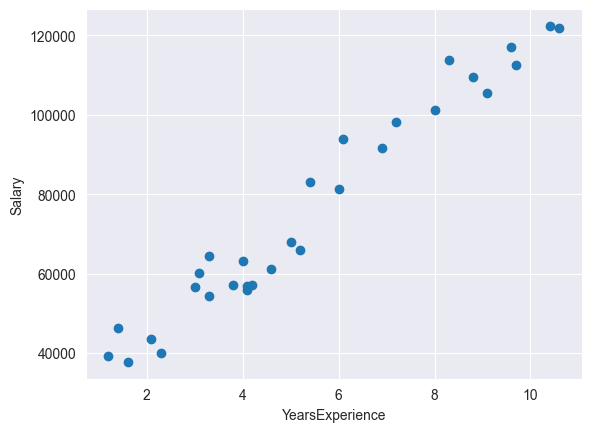

In [138]:
plt.scatter(x,y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

### Создание матрицы характеристик и нахождение beta_0 и beta_1

In [139]:
X = np.hstack([np.ones((len(x), 1)), x])
#print('design matrix X = \n', X)
np_solution = np.linalg.lstsq(X, y, rcond=None)

beta_0, beta_1 = np_solution[0][0], np_solution[0][1]
y_pred = beta_1 * x + beta_0
print(f'Коэффициенты beta_0, beta_1 равны {beta_0.item():.2f}, {beta_1.item():.2f} соответственно.')
print(f'Уравнение принимает вид: y = {beta_0.item():.2f} + {beta_1.item():.2f} * x')
y_pred

Коэффициенты beta_0, beta_1 равны 24848.20, 9449.96 соответственно.
Уравнение принимает вид: y = 24848.20 + 9449.96 * x


array([[ 36188.15875227],
       [ 38078.15121656],
       [ 39968.14368085],
       [ 44693.12484158],
       [ 46583.11730587],
       [ 53198.09093089],
       [ 54143.08716303],
       [ 56033.07962732],
       [ 56033.07962732],
       [ 60758.06078805],
       [ 62648.05325234],
       [ 63593.04948449],
       [ 63593.04948449],
       [ 64538.04571663],
       [ 68318.03064522],
       [ 72098.0155738 ],
       [ 73988.00803809],
       [ 75878.00050238],
       [ 81547.97789525],
       [ 82492.9741274 ],
       [ 90052.94398456],
       [ 92887.932681  ],
       [100447.90253816],
       [103282.8912346 ],
       [108007.87239533],
       [110842.86109176],
       [115567.84225249],
       [116512.83848464],
       [123127.81210966],
       [125017.80457395]])

In [140]:
sse = np_solution[1]
# Остатки
residuals = y - y_pred
# a) MSE — Среднеквадратичная ошибка
mse = np.mean(residuals**2)
# b) RMSE — Корень из среднеквадратичной ошибки
rmse = np.sqrt(mse)
# c) MAE — Средняя абсолютная ошибка
mae = np.mean(np.abs(residuals))
# d) R² — Коэффициент детерминации
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - ss_res / ss_tot
# Список метрик и значений
metrics = ['beta_0', 'beta_1', 'SSE', 'MSE', 'RMSE', 'MAE', 'R²']
values = [beta_0.item(), beta_1.item(), sse[0], mse, rmse, mae, r2]

# Создаем датафрейм
methods = pd.DataFrame(values, index=metrics, columns=['Least Squares Method'])

pd.set_option('display.float_format', '{:.5f}'.format)
methods

,Least Squares Method
beta_0,24848.20397
beta_1,9449.96232
SSE,938128551.66843
MSE,31270951.72228
RMSE,5592.04361
MAE,4644.20129
R²,0.95696


### Выводим график линейной регресии с помощью matplotlib

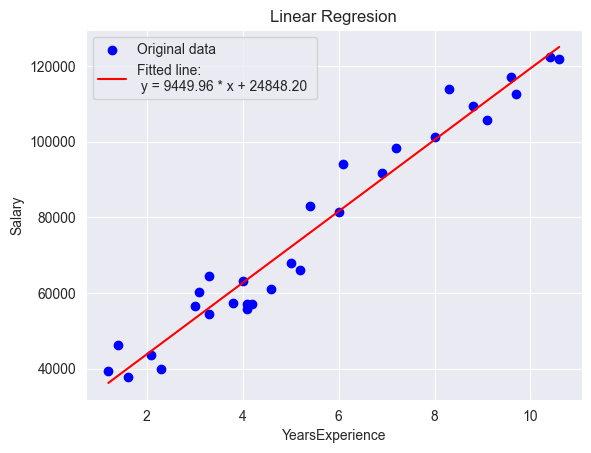

In [141]:
fig, ax = plt.subplots()

ax.scatter(x, y, color = 'b', label= 'Original data')

x_range = np.linspace(min(df['YearsExperience']), max(df['YearsExperience']), 100)
y_pred = beta_1 * x_range + beta_0

ax.plot(x_range, y_pred, color='red', label=f'Fitted line:\n y = {beta_1.item():.2f} * x + {beta_0.item():.2f} ')

ax.grid(True)
ax.legend(loc='best')
ax.set(xlabel = 'YearsExperience', ylabel = 'Salary', title = 'Linear Regresion')

plt.show()

## Решение задачи регрессии с применением numpy, псевдообратной матрицы  
Псевдообратная матрица (обратная Мура-Пенроуза) — это обобщение обратной матрицы, которое применяется в случаях, когда матрица признаков не является квадратной или имеет вырожденную структуру. Она позволяет получить аналитическое решение задачи линейной регрессии через формулу:  
$$
w = (X^T X)^{-1} X^T y
$$

In [142]:
# Решаем через np.linalg.lstsq
np_solution = np.linalg.pinv(X) @ y  # первые элементы — коэффициенты

beta_0, beta_1 = np_solution[0][0], np_solution[1][0]
y_pred = X @ np_solution
residuals = y - y_pred
sse = np.sum(residuals ** 2)

print(f'beta_0 = {beta_0:.3f}')
print(f'beta_1 = {beta_1:.3f}')

print(f'Коэффициенты beta_0, beta_1 равны {beta_0.item():.2f}, {beta_1.item():.2f} соответственно.')
print(f'Уравнение принимает вид: y = {beta_0.item():.2f} + {beta_1.item():.2f} * x')
y_pred

beta_0 = 24848.204
beta_1 = 9449.962
Коэффициенты beta_0, beta_1 равны 24848.20, 9449.96 соответственно.
Уравнение принимает вид: y = 24848.20 + 9449.96 * x


array([[ 36188.15875227],
       [ 38078.15121656],
       [ 39968.14368085],
       [ 44693.12484158],
       [ 46583.11730587],
       [ 53198.09093089],
       [ 54143.08716303],
       [ 56033.07962732],
       [ 56033.07962732],
       [ 60758.06078805],
       [ 62648.05325234],
       [ 63593.04948449],
       [ 63593.04948449],
       [ 64538.04571663],
       [ 68318.03064522],
       [ 72098.0155738 ],
       [ 73988.00803809],
       [ 75878.00050238],
       [ 81547.97789525],
       [ 82492.9741274 ],
       [ 90052.94398456],
       [ 92887.932681  ],
       [100447.90253816],
       [103282.8912346 ],
       [108007.87239533],
       [110842.86109176],
       [115567.84225249],
       [116512.83848464],
       [123127.81210966],
       [125017.80457395]])

In [143]:
sse = np.sum(residuals ** 2)
# Остатки
residuals = y - y_pred
# a) MSE — Среднеквадратичная ошибка
mse = np.mean(residuals**2)
# b) RMSE — Корень из среднеквадратичной ошибки
rmse = np.sqrt(mse)
# c) MAE — Средняя абсолютная ошибка
mae = np.mean(np.abs(residuals))
# d) R² — Коэффициент детерминации
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - ss_res / ss_tot
# Список метрик и значений

methods['Pseudo-inverse Method'] = [beta_0.item(), beta_1.item(), sse, mse, rmse, mae, r2]

methods['Pseudo-inverse Method']

beta_0       24848.20397
beta_1        9449.96232
SSE      938128551.66843
MSE       31270951.72228
RMSE          5592.04361
MAE           4644.20129
R²               0.95696
Name: Pseudo-inverse Method, dtype: float64

При решении задачи линейной регрессии методами наименьших квадратов и с использованием псевдообратной матрицы значения всех метрик качества модели остались практически неизменными. Это свидетельствует о стабильности и эквивалентности этих подходов в вычислении коэффициентов регрессии для данного набора данных.

### Вопрос: чем отличаются операции
* np.matmul
* .dot
*  @

np.matmul - функция из библиотеки NumPy, предназначенная специально для выполнения произведения двух многомерных массивов (матриц). Она поддерживает любые формы массивов, включая многомерные массивы, и работает по правилам матричного умножения. Оператор @ делает все то же самое, что и matmul, но он необходим для компактности кода\
Пример:



In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])
result_matmul = np.matmul(A, B)
result_at = A @ B
print(result_matmul)
print(result_at)

Метод .dot() также из библиотеки NumPy, но он используется для умножения двумерных массивов и работает немного иначе. Если массивы имеют одинаковую размерность, он выполнит поэлементное умножение и работает быстрее, чем matmul, когда речь идет о простых матрицах.\
Пример:


In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])
result_dot = A.dot(B)

print(result_dot)

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6], [4, 5, 6]])
B = np.array([[1, 2, 3], [4, 5, 6], [4, 5, 6]])
result_dot = A.dot(B)

print(result_dot)

Функции np.matmul, оператор @ и метод .dot в Python используются для умножения массивов, но между ними есть небольшие отличия. np.matmul и оператор @ всегда выполняют строго матричное умножение, воспринимая входные данные как двумерные или многомерные матрицы. Метод .dot же более гибкий: в зависимости от формы входных массивов он может выполнять и матричное умножение, и скалярное произведение для одномерных векторов. Из-за этого при работе с массивами разной размерности .dot иногда ведёт себя иначе по сравнению с np.matmul и @. Поэтому при выборе метода умножения стоит учитывать форму данных и ожидаемый результат.

## Решение задачи линейной регрессии с помощью SCLearn

Scikit-learn — популярная библиотека на Python для машинного обучения, которая содержит готовые и оптимизированные реализации линейной регрессии и других моделей. Она упрощает обучение, оценку и применение моделей, предоставляя удобный интерфейс для работы с данными.

Создаем модель и обучаем ее с помощью метода .fit

In [145]:
x = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = LinearRegression()
model.fit(x_train, y_train)

beta_0 = model.intercept_
beta_1 = model.coef_[0]
print(f'Коэффициенты beta_0, beta_1 равны {beta_0:.2f}, {beta_1:.2f} соответственно.')
print(f'Уравнение принимает вид: y = {beta_0:.2f} + {beta_1:.2f} * x')

Коэффициенты beta_0, beta_1 равны 25329.28, 9545.40 соответственно.
Уравнение принимает вид: y = 25329.28 + 9545.40 * x


In [146]:
# Предсказания на тесте
y_pred = model.predict(x_test)

# Остатки
residuals = y_test - y_pred

# Сумма квадратов остатков (SSE)
sse = np.sum(residuals**2)

# Среднеквадратичная ошибка (MSE)
mse = np.mean(residuals**2)

# Корень из MSE (RMSE)
rmse = np.sqrt(mse)

# Средняя абсолютная ошибка (MAE)
mae = np.mean(np.abs(residuals))

# Коэффициент детерминации R²
r2 = model.score(x_test, y_test)
methods['SCLearn'] = [beta_0.item(), beta_1.item(), sse, mse, rmse, mae, r2]

methods['SCLearn']

beta_0       25329.28426
beta_1        9545.39533
SSE      360812498.70304
MSE       40090277.63367
RMSE          6331.68837
MAE           5932.53255
R²               0.94244
Name: SCLearn, dtype: float64

В данной работе мы разделили исходный датасет на тренировочную и тестовую выборки. Такой подход необходим для оценки качества модели на новых данных и предотвращения переобучения. Однако уменьшение объема тренировочных данных привело к снижению точности предсказаний модели, обученной с помощью библиотеки scikit-learn. Это объясняется тем, что меньший объем данных ограничивает способность модели выявлять закономерности, что отражается на ухудшении качества прогнозов.

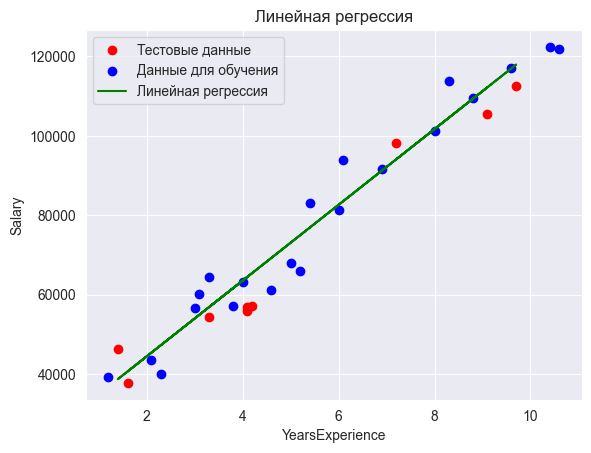

In [147]:
plt.scatter(x_test, y_test, color='red', label='Тестовые данные')
plt.scatter(x_train, y_train, color='blue', label='Данные для обучения')
plt.plot(x_test, y_pred, color='green', label='Линейная регрессия')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

## Квадратичная регрессия

Квадратичная регрессия — расширение линейной регрессии, в которой помимо исходных признаков добавляются их квадраты и произведения, что позволяет модели учитывать нелинейные зависимости между признаками и целевой переменной. Такая модель способна лучше описывать сложные взаимосвязи, но при этом требует аккуратной настройки во избежание переобучения.

### Уравнение квадратичной регрессии
### $$ y = \beta_2\cdot x^2 + \beta_1\cdot x + \beta_0 $$

In [148]:
x = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary']

X = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1), np.square(x).reshape(-1, 1)])
#print('Design matrix X = \n', X)

solution = np.linalg.lstsq(X, y, rcond=None)

beta_0, beta_1, beta_2 = solution[0][0].item(), solution[0][1].item(), solution[0][2].item()
print(f'Коэффициенты beta_0, beta_1 равны {beta_0:.2f}, {beta_1:.2f} соответственно.')
print(f'Уравнение принимает вид: y = + {beta_2:.2f} * x^2 + {beta_1:.2f} * x {beta_0:.2f}')

Коэффициенты beta_0, beta_1 равны 25290.17, 9256.01 соответственно.
Уравнение принимает вид: y = + 16.39 * x^2 + 9256.01 * x 25290.17


In [149]:
methods.loc[len(methods)] = np.nan
methods.index.values[-1] = 'beta_2'

In [150]:
x = df['YearsExperience'].values
sse = np_solution[1][0]
y_pred = beta_0 + beta_1 * x + beta_2 * np.square(x)
# Остатки
residuals = y - y_pred
# a) MSE — Среднеквадратичная ошибка
mse = np.mean(residuals**2)
# b) RMSE — Корень из среднеквадратичной ошибки
rmse = np.sqrt(mse)
# c) MAE — Средняя абсолютная ошибка
mae = np.mean(np.abs(residuals))
# d) R² — Коэффициент детерминации
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - ss_res / ss_tot


methods['Least Squares (Quadratic)'] = [beta_0, beta_1, sse, mse, rmse, mae, r2, beta_2]


methods['Least Squares (Quadratic)']

beta_0      25290.16821
beta_1       9256.00537
SSE          9449.96232
MSE      31257508.45095
RMSE         5590.84148
MAE          4653.06904
R²              0.95698
beta_2         16.39257
Name: Least Squares (Quadratic), dtype: float64

#### Попробуем построить график квадратичной регрессии

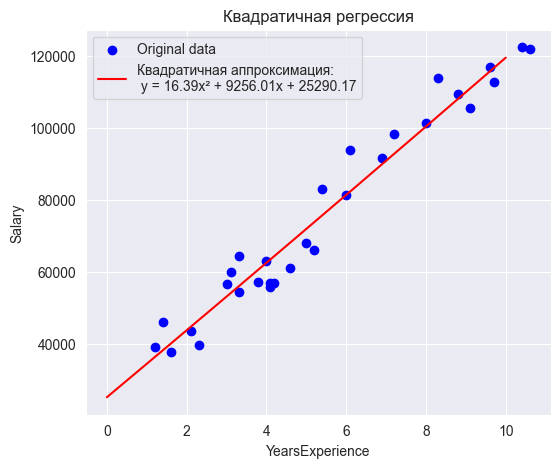

In [151]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.scatter(x, y, color='b', label='Original data')

x_range = np.linspace(0, 10, 200)

y_pred = beta_2 * x_range**2 + beta_1 * x_range + beta_0

ax.plot(x_range, y_pred, color='r', label=f'Квадратичная аппроксимация:\n y = {beta_2:.2f}x² + {beta_1:.2f}x + {beta_0:.2f}')

ax.grid(True)
ax.legend(loc='best')
ax.set_xlabel('YearsExperience')
ax.set_ylabel('Salary')
ax.set_title('Квадратичная регрессия')

plt.show()

Квадратичная регрессия показала лишь незначительное улучшение точности модели, которое находится на уровне погрешности, что говорит о том, что добавление квадратичного члена дало небольшое преимущество в описании данных.

In [152]:
methods

,Least Squares Method,Pseudo-inverse Method,SCLearn,Least Squares (Quadratic)
beta_0,24848.20397,24848.20397,25329.28426,25290.16821
beta_1,9449.96232,9449.96232,9545.39533,9256.00537
SSE,938128551.66843,938128551.66843,360812498.70304,9449.96232
MSE,31270951.72228,31270951.72228,40090277.63367,31257508.45095
RMSE,5592.04361,5592.04361,6331.68837,5590.84148
MAE,4644.20129,4644.20129,5932.53255,4653.06904
R²,0.95696,0.95696,0.94244,0.95698
beta_2,NaN,NaN,NaN,16.39257


В данной лабораторной работе при решении задачи линейной регрессии методами наименьших квадратов и с использованием псевдообратной матрицы значения всех метрик качества модели
остались неизменными. Это свидетельствует о стабильности и эквивалентности этих подходов в вычислении коэффициентов регрессии для данного набора данных.  
Мы разделили исходный датасет на тренировочную и тестовую выборки. Такой подход необходим для оценки качества модели на новых данных и предотвращения переобучения. Однако
уменьшение объема тренировочных данных привело к снижению точности предсказаний модели, обученной с помощью библиотеки scikit-learn. Это объясняется тем, что меньший объем данных
ограничивает способность модели выявлять закономерности, что отражается на ухудшении качества прогнозов.  
Квадратичная регрессия показала лишь незначительное улучшение точности модели, которое находится на уровне погрешности, что говорит о том, что добавление квадратичного члена дало небольшое преимущество в описании данных.

#### Из проделланной работы мы узнали, что такое линейная и квадратичная регрессии. Получили опыт работы с датасетом с помощью библиотеки pandas, опыт написания кода решения уравнения линейной и квадратичной регрессии. Вывели графики регрессий с помощью matplotlib, и создали, и обучили модель линейной регрессии благодаря SCLearn. Гипотеза была доказана, Зарплата работника прямо пропорционально зависит от его стажа работы.